# Ini

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

In [478]:
df = pd.read_excel('../ini_data/datamon.xlsx')

# Delivery Dates

In [479]:
def date_parse(s):
    if isinstance(s, datetime):
        return s
    elif isinstance(s, str):
        return datetime.strptime(s, '%d.%m.%Y')
    return None

df['Дата поставки'] = df['Дата поставки'].apply(date_parse)

In [480]:
df.sample(5)

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик
1836,Полумуфта ведущая ОДК 3547.00.04.381,2019-08-10,2019-07-22,19.0,130.0,Республика Карелия,4,6369.426752,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,4012
3199,Ось 3712.05.02.002,2018-11-08,NaT,NaN,180.0,Республика Карелия,2,274059.872611,NaN,NaN,4011
91,ОСЬ 150Х380 Г34-44-01/3532.21.00.012,2016-09-15,2016-02-16,212.0,130.0,Мурманская область,2,7165.605096,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3987
1649,Блок 3519.21.00.011,2019-10-25,2018-12-26,303.0,220.0,Республика Карелия,1,156055.414013,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011
3263,Засов днища 11078.51.154СБ,2019-12-06,NaT,NaN,30.0,Республика Карелия,1,50000.000000,NaN,NaN,4012


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Наименование                                            4015 non-null   object        
 1   Дата поставки                                           4005 non-null   datetime64[ns]
 2   Дата заказа                                             2939 non-null   datetime64[ns]
 3   Срок поставки                                           2939 non-null   float64       
 4   Плановый срок поставки                                  3994 non-null   float64       
 5   Регион                                                  4015 non-null   object        
 6   Объем заказа                                            4015 non-null   int64         
 7   Цена, руб                                               4015

In [482]:
df.describe()

,Срок поставки,Плановый срок поставки,Объем заказа,"Цена, руб",НРП - нерегламентная потребность (внеплановая закупка),Поставщик
count,2939.00000,3994.000000,4015.000000,4.015000e+03,303.0,4015.00000
mean,127.45900,170.007762,7.817186,7.182498e+05,1.0,3900.50411
std,123.42362,88.446546,51.075264,4.395519e+06,0.0,318.22084
min,0.00000,15.000000,1.000000,2.229299e+01,1.0,259.00000
25%,49.00000,90.000000,1.000000,2.101911e+04,1.0,3987.00000
50%,95.00000,180.000000,2.000000,1.121019e+05,1.0,4011.00000
75%,172.00000,220.000000,4.000000,3.589599e+05,1.0,4012.00000
max,807.00000,470.000000,1500.000000,1.649682e+08,1.0,4014.00000


# Names

In [483]:
df.Наименование.nunique()

1008

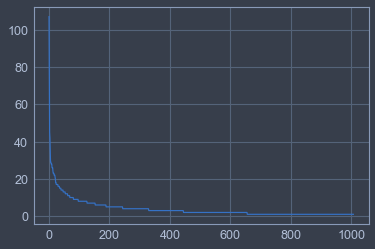

In [484]:
plt.plot(sorted(df.Наименование.value_counts(), reverse=True));

In [485]:
df['Наименование2'] = df.Наименование.apply(lambda s: s.lower().strip().replace("  ", "").replace('.', '-'))

In [486]:
df.head()

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2
0,ШКИВ К МПЭ-350-900 3536.19.00.200,2017-04-10,2015-06-09,671.0,210.0,Республика Карелия,1,3.839490e+04,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,шкив к мпэ-350-900 3536-19-00-200
1,СТРЕЛА 1085.05.00СБ,2015-11-10,2015-08-03,99.0,180.0,Вологодская область,1,2.050955e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,стрела 1085-05-00сб
2,УСТРОЙСТВО КУЭ-3 04УХЛ2,2015-10-27,2015-08-03,85.0,150.0,Вологодская область,1,1.337580e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,устройство куэ-3 04ухл2
3,ВТУЛКА 1080.33.70,2015-08-31,2015-08-03,28.0,30.0,Вологодская область,6,3.439490e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,втулка 1080-33-70
4,ЗУБ КОВША 1085.52.05-1СБ НАПЛАВКА,2015-08-31,2015-08-03,28.0,75.0,Вологодская область,30,6.496815e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,зуб ковша 1085-52-05-1сб наплавка


In [487]:
df.Наименование2.nunique()

956

In [488]:
# clean names
sub_dict = {
    r"(зуб)\s(.*)\s*(ковша)\s*(.+)": r"\1 \3 \2 \4",
    ",* *с наплавкой": " наплавка",
    "венец зубчатый": "венец зубч",
    r"блоки голов-": "блоки голов",
    r"блоки головные": "блоки голов",
    r"блоки отклон-": "блоки отклон",
    r"блок-шестерня(\d)": r"блок-шестерня \1",
    r"блок(\d)": "блок \\1",    # TODO: "блок3"
    r"блок3": "блок 3",
    "блок управления": "блок упр",
    r"блок,": "блок",
    "блоки ": "блок ",
    "блок головной": "блок голов",
    "венец3": "венец 3",
    r"венец(\d)": "венец \\1",
    r"втулка(\d)": "втулка \\1",
    # TODO: "днище"
    r"засов(\d)": "засов \\1",
    r"звено(\d)": "звено \\1",
    r"зуб(\d)": "зуб \\1",
    r"ковш(\d)": "ковш \\1",
    r"колесо(\d)": "колесо \\1",
    r"^([а-яa-z]+)(\d)": "\\1 \\2",
    # TODO: колесо
    "- ": " ",
    "   ": " ",
    "  ": " ",
    " ,": ",",
    r",(\S)": r", \1", 
}

df['Наименование3'] = df.Наименование2

for k, v in sub_dict.items():
    df.Наименование3 = df.Наименование3.apply(lambda s: re.sub(k, v, s))  

# Group Items

In [501]:
group_dict = {
    "амортизатор \d": "амортизатор",
    "барабан \d": "барабан",
    "блок \d": "блок",
    "блок голов": "блок голов",
    "блок трмз": "блок трмз",
    "блок упр": "блок упр",
    "блок-шес": "блок-шестерня",
    "болт \d": "болт",
    "бронь конуса": "бронь конуса",
    "вал \d": "вал",
    "вал веду": "вал ведущий",
    "вал промеж": "вал промежуточный",
    "вал трмз": "вал трмз",
    "вал-шест": "вал-шестерня",
    "вант ": None,
    "венец зубч": "венец зубч",
    "венец \d": "венец",
    "вентилятор": None,
    "винт": None,
    "вкладыш": None,
    "водило": None,
    "втулка \d": "втулка",
    "втулка бронз": None,
    "втулка колеса": None,
    "втулка напорной оси": None,
    "втулка сзсм": None,
    "втулка трубы": None,
    "г/цил": None,
    "гайка": None,
    "джойстик": None,
    "днище": None,
    "засов": None,
    "звездочка": None,
    "звено": None,
    "зуб": None,
    "изолятор": None,
    "клин": None,
    "ковш": None,
    "колесо": None,
    "колодка торм": None,
    "кольцо \d": "кольцо",
    "комплект каб": None,
    "компрессор": None,
    "контролер": None,
    "коромысло": None,
    "корпус": None,
    "круг \d": "круг",
    "круг опор": None,
    "круг рол": None,
    "крышка": None,
    "кулак": None,
    "лебедка": None,
    "лента гус": None,
    "лестница": None,
    "муфта": None,
    "накладка": None,
    "напорная ось": None,
    "обойма \d": "обойма",
    "ось": None,
    "п/муфта": None,
    "п/цил": None,
    "пн/цил": "п/цил",
    "пневмоцилиндр": "п/цил",
    "палец": None,
    "передача": None,
    "переключатель": None,
    "петля": None,
    "пластина": None,
    "плата": None,
    "подвеска \d": "подвеска",
    "подвеска ковша": None,
    "подвеска трмз": None,
    "подкос": None,
    "подшипник": None,
    "ползун": None,
    "полублок": None,
    "полумуфта": None,
    "полухомут": None,
    "пружина": None,
    "рама": None,
    "редуктор": None,
    "рейка": None,
    "рельс": None,
    "ролик": None,
    "рукоять": None,
    "рычаг": None,
    "секция стрелы": None,
    "стекло": None,
    "стенка": None,
    "стойка": None,
    "стрела": None,
    "тележка": None,
    "токоприемник": None,
    "тормоз": None,
    "тяга": None,
    "узел": None,
    "фланец": None,
    "футеровка": None,
    "хомут": None,
    "цанга": None,
    "цапфа": None,
    "цепь": None,
    "цилиндр": None,
    "шайба": None,
    "шестерня": None,
    "шкаф": None,
    "шкив": None,
    "шпилька": None
}

df['Группа'] = None
for k, v in group_dict.items():
    df.Группа = df.apply(
        lambda r: 
        (v if v else k)
        if (
            re.search(k, r.Наименование3) 
            and re.search(k, r.Наименование3).start() == 0 
        )
        else r.Группа,
        axis=1 
    )
    
names_out = df[['Наименование', 'Наименование3', 'Группа']]
names_out.drop_duplicates(subset='Наименование3', inplace=True)
names_out = names_out.sort_values('Наименование3', ascending=True)
names_out.to_excel('tmp.xlsx', index=False)

# l = list(names_out[names_out.str.contains('блок3')].values)[0]
# l

C:\Users\kan\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Payment terms

In [42]:
df['Условия платежа'].unique()

array(['ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 45 дней с даты ППС ДЕНЬГИ 100%',
       nan,
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 20 дней с даты перехода права собственности (ППС)  ДЕНЬГИ 100% ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 80 дней с даты ППС ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 5 дней с даты счета-фактуры  ДЕНЬГИ 100% ',
       'ПРЕДОПЛАТА 100% в течение 10 дней с даты счета на предоплату ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 15 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты счета-фактуры ДЕНЬГИ 100%'],
      dtype=object)

Looks fine. Not touched.

# Order date

In [475]:
# TODO assignment shall be to `r`, not to `df.loc[i, ...]`
df['Расчетная дата заказа'] = None
df['Дата заказа фактическая'] = None
for i, r in df.iterrows():
    if pd.notnull(r['Дата заказа']):
        df.loc[i, 'Расчетная дата заказа'] = df.loc[i, 'Дата заказа']
        df.loc[i, 'Дата заказа фактическая'] = True
    elif pd.notnull(r['Дата поставки']) and pd.notnull(r['Плановый срок поставки']):
        df.loc[i, 'Расчетная дата заказа'] = df.loc[i, 'Дата поставки'] - timedelta(days=df.loc[i, 'Плановый срок поставки'])
        df.loc[i, 'Дата заказа фактическая'] = False

df.sample(8)

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Расчетная дата заказа,Дата заказа фактическая
1384,Колесо 3519.05.02.061,2018-12-12,2018-12-05,7.0,120.0,Мурманская область,1,4.870121e+05,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,2018-12-05 00:00:00,True
2172,Зуб 1085.52.05-1,2020-06-30,2020-05-29,32.0,75.0,Вологодская область,8,9.388535e+03,NaN,NaN,3989,2020-05-29 00:00:00,True
3210,Секция стрелы 3546.03.01.000-01,2020-01-10,NaT,NaN,270.0,Республика Карелия,1,6.497576e+06,NaN,NaN,4011,2019-04-15 00:00:00,False
3579,Колесо 3519.05.02.200,2022-04-20,2021-09-24,208.0,205.0,Республика Карелия,8,1.433121e+05,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 45 дней с да...,NaN,4014,2021-09-24 00:00:00,True
3779,Водило 3534.11.01.003,2021-12-05,2021-05-28,191.0,210.0,Республика Карелия,2,4.777070e+04,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,4012,2021-05-28 00:00:00,True
3092,Звено 3712.05.17.001-01,2018-05-17,NaT,NaN,170.0,Республика Карелия,3,2.126701e+05,NaN,NaN,4011,2017-11-28 00:00:00,False
2924,Вал 3519.05.02.062,2021-08-23,NaT,NaN,400.0,Мурманская область,1,1.273885e+05,NaN,NaN,3927,2020-07-19 00:00:00,False
2833,Кольцо 1085.75.355,2021-03-02,NaT,NaN,90.0,Вологодская область,2,3.057325e+03,NaN,NaN,3989,2020-12-02 00:00:00,False


In [474]:
df[df['Дата заказа фактическая'].isnull()]


,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Расчетная дата заказа,Дата заказа фактическая
2402,Редуктор 3555.11.01.000СБ,NaT,NaT,NaN,330.0,Республика Карелия,1,1.496815e+06,NaN,NaN,4014,None,None
2403,Редуктор 3555.11.01.000СБ,NaT,NaT,NaN,330.0,Республика Карелия,1,1.624204e+06,NaN,NaN,4012,None,None
2414,РУКОЯТЬ ФЛАНЦЕВАЯ 3536.38.00.000СБ,NaT,NaT,NaN,200.0,Республика Карелия,2,1.902548e+06,NaN,NaN,4014,None,None
2489,Блок 3536.03.00.150,NaT,NaT,NaN,100.0,Республика Карелия,4,2.675159e+05,NaN,NaN,4014,None,None
2515,Вал ТРМЗ 3572.05.10.200,NaT,NaT,NaN,220.0,Республика Карелия,10,2.625478e+05,NaN,NaN,4014,None,None
2569,Вал 3532.10.01.011,NaT,NaT,NaN,160.0,Республика Карелия,6,1.121019e+05,NaN,NaN,4014,None,None
2730,Лебедка 3536.08.00.000,NaT,NaT,NaN,330.0,Республика Карелия,1,4.299363e+06,NaN,NaN,4014,None,None
2980,Обойма ТРМЗ 3532.21.00.100СБ,NaT,NaT,NaN,200.0,Республика Карелия,2,2.484076e+05,NaN,NaN,4014,None,None
3439,Колесо ведущее в сборе черт.3712.05.02.5,2019-07-10,NaT,NaN,NaN,Республика Карелия,2,1.838399e+06,NaN,NaN,4011,None,None
3440,"Напорная ось 63,64 черт.3646.03.04.002",2019-07-10,NaT,NaN,NaN,Республика Карелия,2,6.712962e+05,NaN,NaN,4011,None,None
